## Import and read csv using file managment system
First, we import an example year. As I have not introduced the API yet, I will read in an exisiting csv file
for the 2010 data for the location 32.49 -103.38 available here (https://www.nrel.gov/gis/solar-resource-maps.html).

*You likely will need to update the read location!*

In [2]:
import sys
import os
import pandas as pd


In [3]:
#View path
sys.path

['c:\\D_drive\\Columbia 2022\\Climate\\PROJECT and Repo\\ML-Climate-Project-ahx2001\\src\\Notebooks',
 'c:\\Users\\andre\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip',
 'c:\\Users\\andre\\AppData\\Local\\Programs\\Python\\Python39\\DLLs',
 'c:\\Users\\andre\\AppData\\Local\\Programs\\Python\\Python39\\lib',
 'c:\\Users\\andre\\AppData\\Local\\Programs\\Python\\Python39',
 '',
 'C:\\Users\\andre\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\andre\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32',
 'C:\\Users\\andre\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib',
 'C:\\Users\\andre\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin',
 'c:\\Users\\andre\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages']

In [4]:
#Check working directory
print(os.getcwd())

c:\D_drive\Columbia 2022\Climate\PROJECT and Repo\ML-Climate-Project-ahx2001\src\Notebooks


In [5]:
#Test reading from data folder.
#YOU LIKELY NEED TO UPDATE THIS to match your system
df = pd.read_csv(r"C:\D_drive\Columbia 2022\Climate\PROJECT and Repo\ML-Climate-Project-ahx2001\src\Datasets\sample_data\data\525682_31.49_-103.38_2010.csv",
                engine='python')

In [6]:
#Testing on dataset
df = pd.read_csv('test.csv', engine='python' )
print(df.columns.values) 
"""
Results: 
['Source' 'Location ID' 'City' 'State' 'Country' 'Latitude' 'Longitude'
 'Time Zone' 'Elevation' 'Local Time Zone' 'Clearsky DHI Units'
 'Clearsky DNI Units' 'Clearsky GHI Units' 'Dew Point Units' 'DHI Units'
 'DNI Units' 'GHI Units' 'Solar Zenith Angle Units' 'Temperature Units'
 'Pressure Units' 'Relative Humidity Units' 'Precipitable Water Units'
 'Wind Direction Units' 'Wind Speed Units' 'Cloud Type -15' 'Cloud Type 0'
 'Cloud Type 1' 'Cloud Type 2' 'Cloud Type 3' 'Cloud Type 4'
 'Cloud Type 5' 'Cloud Type 6' 'Cloud Type 7' 'Cloud Type 8'
 'Cloud Type 9' 'Cloud Type 10' 'Cloud Type 11' 'Cloud Type 12'
 'Fill Flag 0' 'Fill Flag 1' 'Fill Flag 2' 'Fill Flag 3' 'Fill Flag 4'
 'Fill Flag 5' 'Surface Albedo Units' 'Version']
"""

#We can clearly see we need to do some data cleanup. 


['Source' 'Location ID' 'City' 'State' 'Country' 'Latitude' 'Longitude'
 'Time Zone' 'Elevation' 'Local Time Zone' 'Clearsky DHI Units'
 'Clearsky DNI Units' 'Clearsky GHI Units' 'Dew Point Units' 'DHI Units'
 'DNI Units' 'GHI Units' 'Solar Zenith Angle Units' 'Temperature Units'
 'Pressure Units' 'Relative Humidity Units' 'Precipitable Water Units'
 'Wind Direction Units' 'Wind Speed Units' 'Cloud Type -15' 'Cloud Type 0'
 'Cloud Type 1' 'Cloud Type 2' 'Cloud Type 3' 'Cloud Type 4'
 'Cloud Type 5' 'Cloud Type 6' 'Cloud Type 7' 'Cloud Type 8'
 'Cloud Type 9' 'Cloud Type 10' 'Cloud Type 11' 'Cloud Type 12'
 'Fill Flag 0' 'Fill Flag 1' 'Fill Flag 2' 'Fill Flag 3' 'Fill Flag 4'
 'Fill Flag 5' 'Surface Albedo Units' 'Version']


"\nResults: \n['Source' 'Location ID' 'City' 'State' 'Country' 'Latitude' 'Longitude'\n 'Time Zone' 'Elevation' 'Local Time Zone' 'Clearsky DHI Units'\n 'Clearsky DNI Units' 'Clearsky GHI Units' 'Dew Point Units' 'DHI Units'\n 'DNI Units' 'GHI Units' 'Solar Zenith Angle Units' 'Temperature Units'\n 'Pressure Units' 'Relative Humidity Units' 'Precipitable Water Units'\n 'Wind Direction Units' 'Wind Speed Units' 'Cloud Type -15' 'Cloud Type 0'\n 'Cloud Type 1' 'Cloud Type 2' 'Cloud Type 3' 'Cloud Type 4'\n 'Cloud Type 5' 'Cloud Type 6' 'Cloud Type 7' 'Cloud Type 8'\n 'Cloud Type 9' 'Cloud Type 10' 'Cloud Type 11' 'Cloud Type 12'\n 'Fill Flag 0' 'Fill Flag 1' 'Fill Flag 2' 'Fill Flag 3' 'Fill Flag 4'\n 'Fill Flag 5' 'Surface Albedo Units' 'Version']\n"

In [7]:
#Adjust csv: We remove the first two rows as these contain information about the location, but should not be headers 
# of the time based data
with open("test.csv",'r') as f:
    with open("updated_test.csv",'w') as f1:
        next(f)
        next(f) # skip header line
        for line in f:
            f1.write(line)

In [8]:
df_full = pd.read_csv('updated_test.csv', engine='python' )
# print(df_full.columns.values) 
"""
Results:
['Year' 'Month' 'Day' 'Hour' 'Minute' 'DHI' 'DNI' 'Temperature' 'GHI']
"""
#This is the format we want.

"\nResults:\n['Year' 'Month' 'Day' 'Hour' 'Minute' 'DHI' 'DNI' 'Temperature' 'GHI']\n"

## EDA: GHI and Temperature
We must consider how we want to look at overlapping temp and GHI. As they but varry quite a bit over even just the 30 minute block, it is hard to tell how we determine the quality of absorbtion over a day. We could just take the average but, if the temperature was very high during the GHI's peak, then we might have a poor metric of it was very cold over the rest of a day. This also might not generalize. As such, we do EDA to look at the data's performance

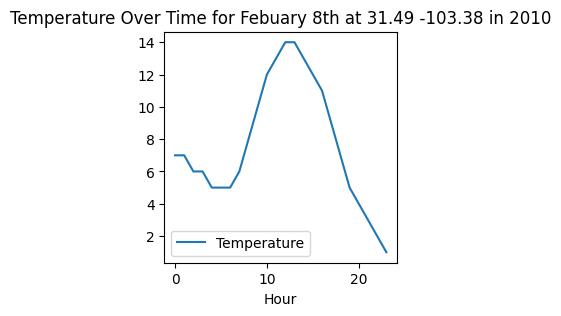

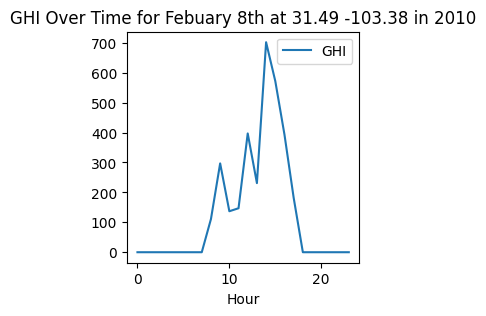

In [9]:
# Look at a single day and only where GHI is not 0:
df = df_full
df = df.loc[df['Month'] == 2]
df = df.loc[df['Day'] == 8]
# df = df.loc[df['GHI'] != 0]
df

#look at relationship between GHI and Temp:
df.plot(x="Hour", y=["Temperature"],
        kind="line", figsize=(3, 3), title="Temperature Over Time for Febuary 8th at 31.49 -103.38 in 2010")
df.plot(x="Hour", y=["GHI"],
        kind="line", figsize=(3, 3),title= "GHI Over Time for Febuary 8th at 31.49 -103.38 in 2010")
 

#Keep information
ghi_sum = df['GHI'].sum() #sum of GHI

As we can see, there are cases where variation in temperature doesn't correlate with variation in GHI. Why is this an issue? If we blindly take the average GHI and average temperature for the day, we may not capture how the two actually interact. For example, if we have notably cold nights, our average temperature will be lower thus incorrectly indicating a better efficiency when we just use the averages, even if the temperature during the day is the same. As such, we will look over each day by summing the PO over each 30 minute block to calculate the true relative power output. This will be explained and implimented in "Data and Modeling".